<a href="https://colab.research.google.com/github/srikacharla/CSC8980/blob/main/HomeWork1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sri Harsha Kacharla
Student Id: 002556509

1. Write a piece of code using a regular expression in Python to count how many times
the following name appears: CICERO, this regex needs to be case-sensitive. 

In [11]:
import re

string = ""
with open("hw_1-text.txt","r") as f:
    for line in f:
       string+=line
pattern = r'CICERO'
count = 0
for x in re.findall(pattern,string):
    count+=1

print(count)

7


2. Write a regular expression in Python that finds all 6 character words found in this play.

In [13]:
import re

string = ""
with open("hw_1-text.txt","r") as f:
    for line in f:
       string+=line
pattern = r'[a-zA-z]{6}'
count = 0
for x in re.findall(pattern,string):
    count+=1

print(count)

4882


3. Write a piece of code that uses a regular expression in Python to count how many
words are capitalized in the first letter only

In [14]:
import re

string = ""
with open("hw_1-text.txt","r") as f:
    for line in f:
       string+=line
pattern = r'[A-Z][^\s]*'
count = 0
for x in re.findall(pattern,string):
    count+=1

print(count)

5301


4. Write a regular expression using groups in Python that extracts all phrases that have
“son of ” and extract/output the answer in a case-insensitive way. For example, for the
following “I am the son of earth”, should find “son of earth” and extract/output “earth”.


In [15]:
import re

with open("hw_1-text.txt","r") as f:
    for line in f:
        pattern1 = re.compile(" son of (.*?)\s", re.I)
        searched = re.search(pattern1, line)
        if searched != None:
            print(searched.group(1))


Rome
Caesar,
Marcus
Marcus


5. Plays are divided in acts, write a regular expression using groups in Python that
extracts the number of each act found in this play in a case-sensitive way

In [16]:
import re

RomanToInt = {
    'I':1,
    'II':2,
    'III':3,
    'IV':4,
    'V':5
}
with open("hw_1-text.txt","r") as f:
    for line in f:
        # string+=line
        pattern1 = re.compile("ACT (.*?)\s")
        searched = re.search(pattern1, line)
        if searched != None:
            print('ACT '+str(searched.group(1)))
            print('ACT '+str(RomanToInt.get(searched.group(1))))


ACT I
ACT 1
ACT II
ACT 2
ACT III
ACT 3
ACT IV
ACT 4
ACT V
ACT 5


6. Write a Python function that takes the file as an input and outputs how many lines end
with: ? , that is a question mark at the end of the line. This function needs to use a
regular expression

In [17]:
def linesEndingWith(file):
    string = ""
    count =0
    pattern = re.compile(".*\\?$")
    for line in file:
        string+=line
        search = re.search(pattern,line)
        if search is not None:
            count+=1
    print(count)

linesEndingWith(open("hw_1-text.txt", "r"))

215


7. Using the code from Class 04, train a Random Forest classification model for the same
two newsgroups, generate the confusion matrix, and all the same performance metrics.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [19]:
categories = ['rec.autos','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [21]:
model = make_pipeline(CountVectorizer(), RandomForestClassifier())
model.fit(train.data, train.target)
labels = model.predict(test.data)

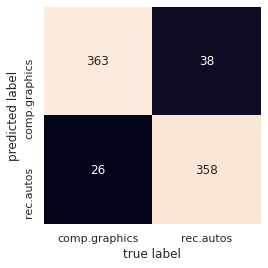

In [23]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [29]:
print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))

Accuracy: 0.9184713375796179
Precision: 0.9322916666666666
Recall: 0.9040404040404041
F1 Score: 0.9184680298604349
Mean Absolute Error: 0.08152866242038216
Mean Squared Error: 0.08152866242038216
Root Mean Squared Error: 0.28553224409929984


Bonus: Using the code from Class 04. Write a function to find the best
performing model for the TF-IDF vectorization. The requirements for this are: 1) Pass all
metrics for each model in a single dataframe (each row has a metric value, each column
is a model type). 2) Make the decision of the best model by counting which column has
the highest F1-score and accuracy.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [61]:
def findBestModel():
  Classifiersdict ={
      0:RandomForestClassifier(),
      1:MultinomialNB(),
      2:Perceptron(),
      3:LogisticRegression(),
      4:DecisionTreeClassifier()
  }
  Classifiers = ["RandomForestClassifier","MultinomialNB","Perceptron","LogisticRegression","DecisionTreeClassifier"]
  accuracy = []
  precision = []
  recall = []
  f1score = []
  mean_absolute_error = []
  mean_squared_error = []
  root_mean_squared_error = []
  for i in range(0,5):
    model = make_pipeline(TfidfVectorizer(),Classifiersdict.get(i)) 
    model.fit(train.data, train.target)
    labels = model.predict(test.data)
    accuracy.append(sklearn.metrics.accuracy_score(test.target,labels))
    precision.append(sklearn.metrics.precision_score(test.target,labels))
    recall.append(sklearn.metrics.recall_score(test.target,labels))
    f1score.append(sklearn.metrics.f1_score(labels, test.target, average='macro'))
    mean_absolute_error.append(sklearn.metrics.mean_absolute_error(test.target,labels))
    mean_squared_error.append(sklearn.metrics.mean_squared_error(test.target, labels))
    root_mean_squared_error.append(np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))
  df = pd.DataFrame(data=[accuracy,precision,recall,f1score,
                          mean_absolute_error,mean_squared_error,root_mean_squared_error],columns=Classifiers)
  bestClassifier=""
  bestF1=0
  bestAccuracy = 0
  for x in df:
    if df.get(x)[3]>bestF1 and df.get(x)[0]>bestAccuracy:
      bestValue = df.get(x)[3]
      bestAccuracy = df.get(x)[0]
      bestClassifier = x
  print(bestClassifier)

findBestModel()

LogisticRegression
